<img src="../../images/qiskit-heading.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trust Notebook" width="500 px" align="left">

# _*Visualizing a Quantum Circuit*_ 

The latest version of this notebook is available on https://github.com/qiskit/qiskit-tutorial.

***
### Contributors
Matthew Treinish

In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# Drawing a Quantum Circuit

When building a quantum circuit it often helps to draw the circuit. This is supported natively by a `QuantumCircuit` object. You can either just call `print()` on the circuit or call the `draw()` method on the object. This will render a `ASCII art version` <https://en.wikipedia.org/wiki/ASCII_art>_ of the circuit diagram.

In [2]:
# Build a quantum circuit

n = 3  # number of qubits 
q = QuantumRegister(n)
c = ClassicalRegister(n)

circuit = QuantumCircuit(q, c)

circuit.x(q[1])
circuit.h(q)
circuit.cx(q[0], q[1])
circuit.measure(q, c);

In [3]:
print(circuit)

                           ┌───┐        ┌─┐
q0_0: |0>──────────────────┤ H ├──■─────┤M├
                 ┌───┐┌───┐└───┘┌─┴─┐┌─┐└╥┘
q0_1: |0>────────┤ X ├┤ H ├─────┤ X ├┤M├─╫─
         ┌───┐┌─┐└───┘└───┘     └───┘└╥┘ ║ 
q0_2: |0>┤ H ├┤M├─────────────────────╫──╫─
         └───┘└╥┘                     ║  ║ 
 c0_0: 0 ══════╬══════════════════════╬══╩═
               ║                      ║    
 c0_1: 0 ══════╬══════════════════════╩════
               ║                           
 c0_2: 0 ══════╩═══════════════════════════
                                           


In [4]:
circuit.draw()

## Alternative Renderers for Circuits

While a text output is useful for quickly seeing the output while developing a circuit it doesn't provide the most flexibility in it's output. There are 2 other alternative output renderers for the quantum circuit. One uses `matplotlib` <https://matplotlib.org/> and the other uses `LaTex` <https://www.latex-project.org/> leveraging the `Qcircuit` package <https://github.com/CQuIC/qcircuit>. These can be specified by using `mpl` and `latex` values for the `output` kwarg on the draw() method.

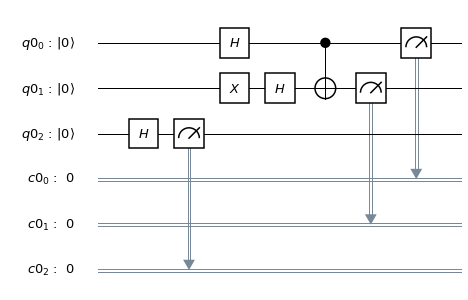

In [5]:
# Matplotlib Drawing
circuit.draw(output='mpl')

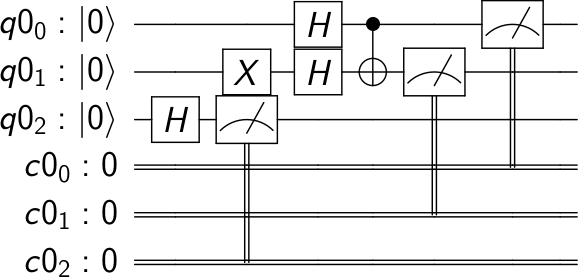

In [6]:
# Latex Drawing
circuit.draw(output='latex')

## Controlling output from circuit.draw()

By default the draw method returns the rendered image as an object and does not output anything. The exact class returned depends on the output specified: `'text'`(the default returns a `TextDrawer` object, `'mpl'` returns a `matplotlib.Figure` object, and `latex` returns a `PIL.Image` object. Having the return types enables modifying or directly interacting with the rendered output from the drawers. Jupyter notebooks understand these return types and render it for us in this tutorial, but when running outside of jupyter you do not have this feature automatically. However, the `draw()` method has optional arguments to display or save the output. When specified the `filename` kwarg takes a path to save the rendered output to. Or if you're using the `mpl` or `latex` outputs you can leverage the `interactive` kwarg to open the image in a new window (this will not always work from within a notebook but will be demonstrated anyway).

In [7]:
# Write text to disk
circuit.draw(output='text', filename='/tmp/circuit.txt')

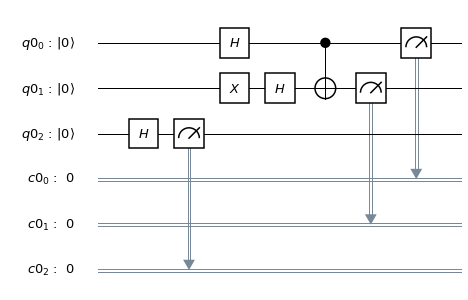

In [8]:
# Write mpl image to disk
circuit.draw(output='mpl', filename='/tmp/circuit_mpl.png')

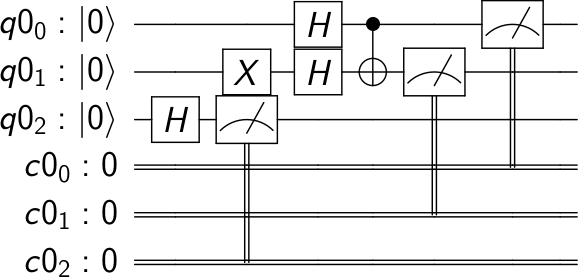

In [9]:
# Write mpl image to disk
circuit.draw(output='latex', filename='/tmp/circuit_latex.png')

/home/computertreker/.venvs/venv3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


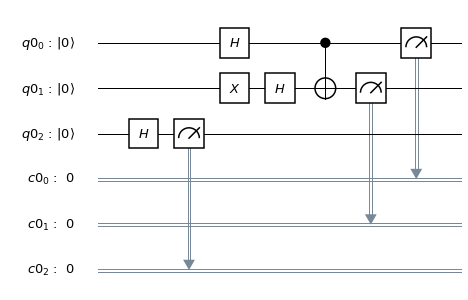

In [10]:
# Show mpl image in new window
circuit.draw(output='mpl', interactive=True)

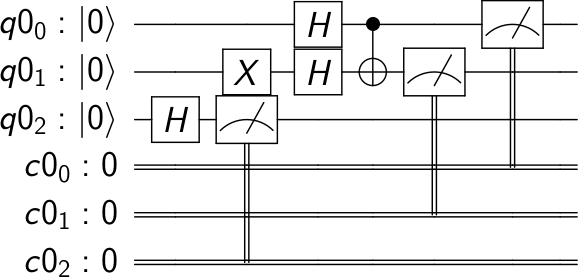

In [11]:
# Show latex image in new window
circuit.draw(output='latex', interactive=True)

## Customizing the output

Depending on the output there are also options to customize the circuit diagram rendered by the circuit.

### Disable Plot Barriers and Reversing Bit Order
The first two options are shared between all 3 backends and they let you configure both the bit orders and whether or not you draw barriers. These can be set by the `reverse_bits` kwarg and `plot_barriers` kwarg respectively. The examples below will work with any output backend, only `latex` is used for brevity.

In [12]:
# Draw a new circuit with barriers and more registers

q_a = QuantumRegister(3, name='qa')
q_b = QuantumRegister(5, name='qb')
c_a = ClassicalRegister(3)
c_b = ClassicalRegister(5)

circuit = QuantumCircuit(q_a, q_b, c_a, c_b)

circuit.x(q_a[1])
circuit.x(q_b[1])
circuit.x(q_b[2])
circuit.x(q_b[4])
circuit.barrier()
circuit.h(q_a)
circuit.barrier(q_a)
circuit.h(q_b)
circuit.cswap(q_b[0], q_b[1], q_b[2])
circuit.cswap(q_b[2], q_b[3], q_b[4])
circuit.cswap(q_b[3], q_b[4], q_b[0])
circuit.barrier(q_b)
circuit.measure(q_a, c_a)
circuit.measure(q_b, c_b);

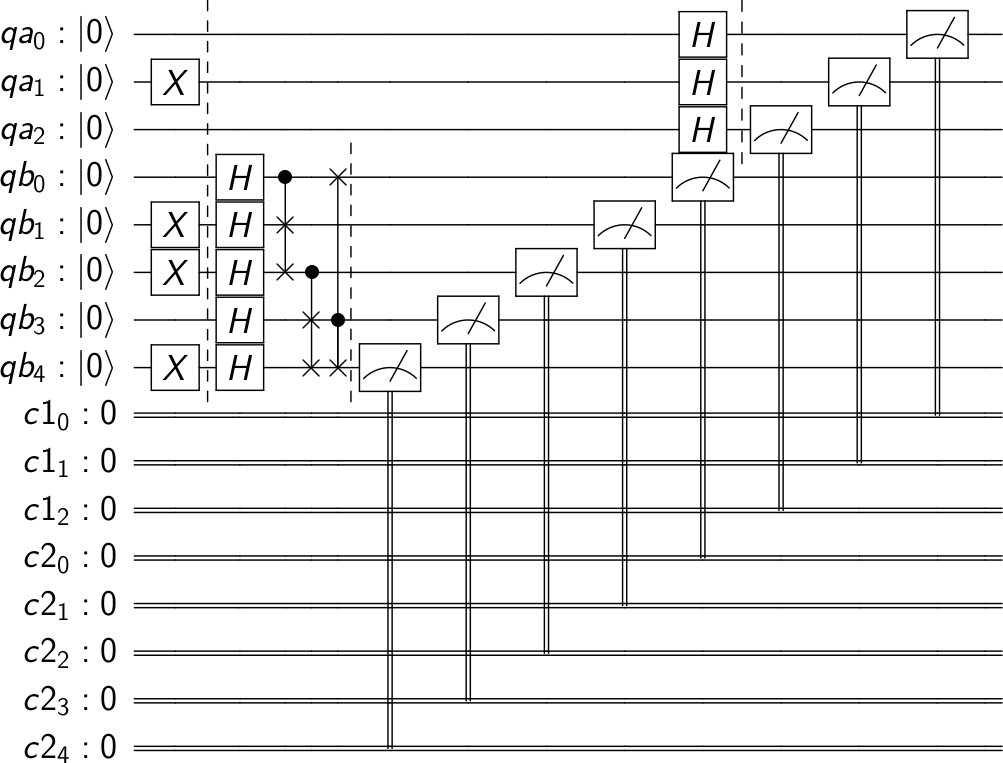

In [13]:
# Draw the circuit
circuit.draw(output='latex')

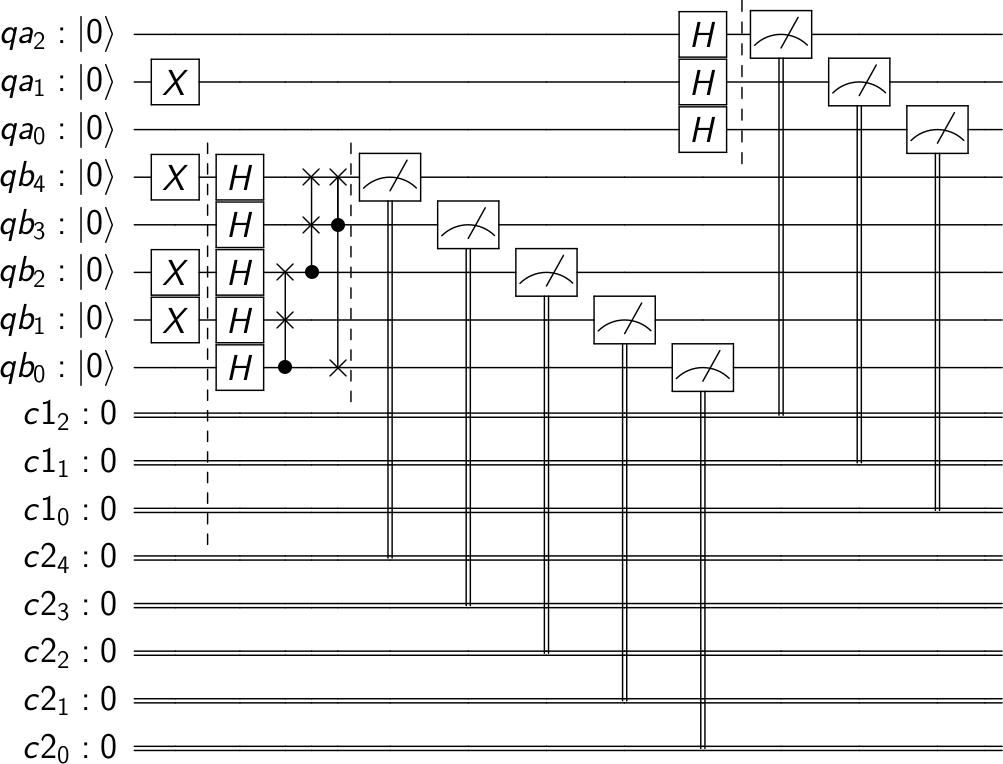

In [14]:
# Draw the circuit with reversed bit order
circuit.draw(output='latex', reverse_bits=True)

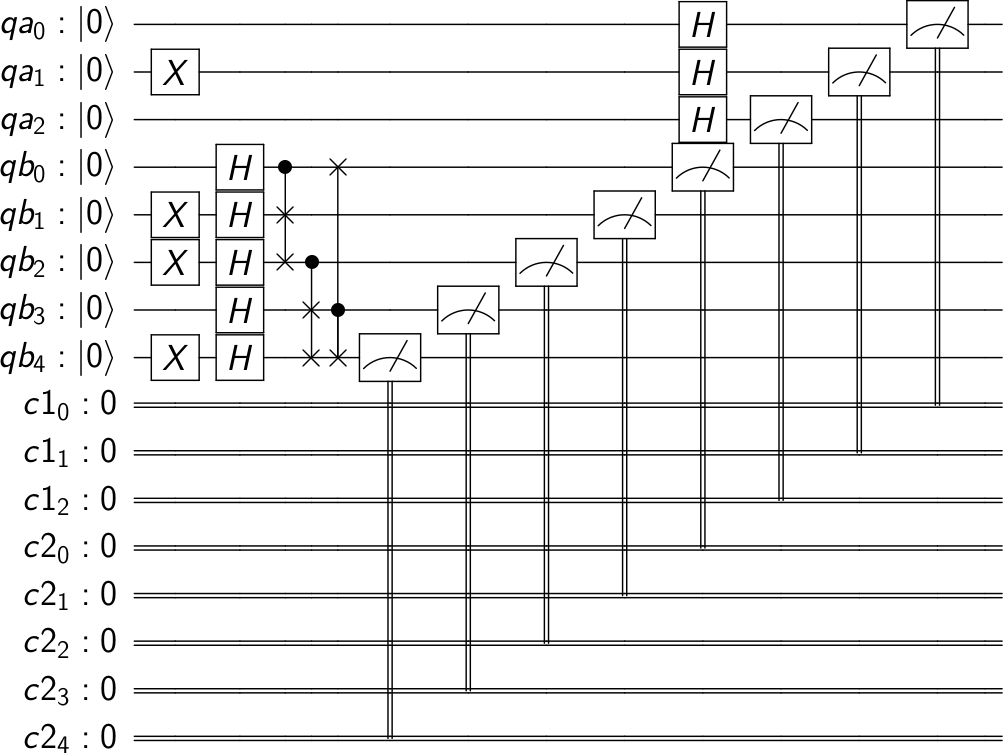

In [16]:
# Draw the circuit without barriers
circuit.draw(output='latex', plot_barriers=False)

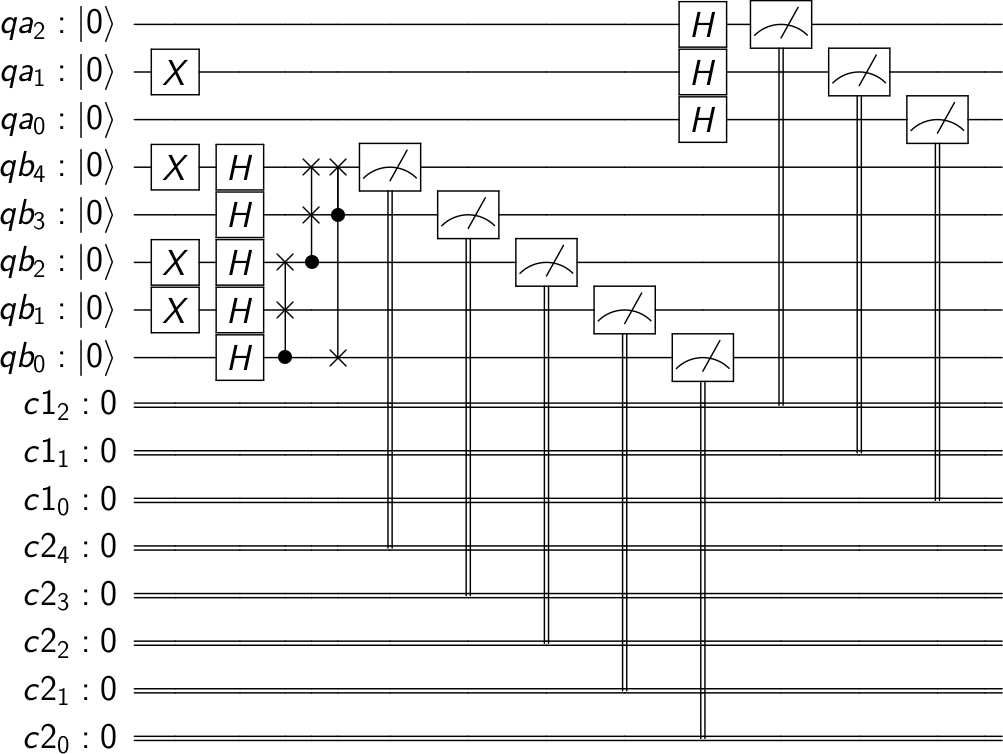

In [17]:
# Draw the circuit without barriers and reverse bit order
circuit.draw(output='latex', plot_barriers=False, reverse_bits=True)

### Backend specific customizations

There are also some options available to customize the output diagram which only work for a specific backend. The `line_length` kwarg for the `text` backend which can be used to set a maximum width for the output. When a diagram is wider than that it will wrap the diagram below. The `mpl` backend has the `style` kwarg which is used to customize the output. The `style` kwarg takes in a dict with many different options in it. It provides a high level of flexibility and enables things like changing colors, changing rendered text for different types of gates, different line styles, etc. Refer to the official documentation **INSERT LINK TO RENDERED DOCS HERE** for a full list of the options available.

In [19]:
# Set line length to 120 for above circuit
circuit.draw(output='text', line_length=120)

In [20]:
# Set line length to 80 for above circuit
circuit.draw(output='text', line_length=80)

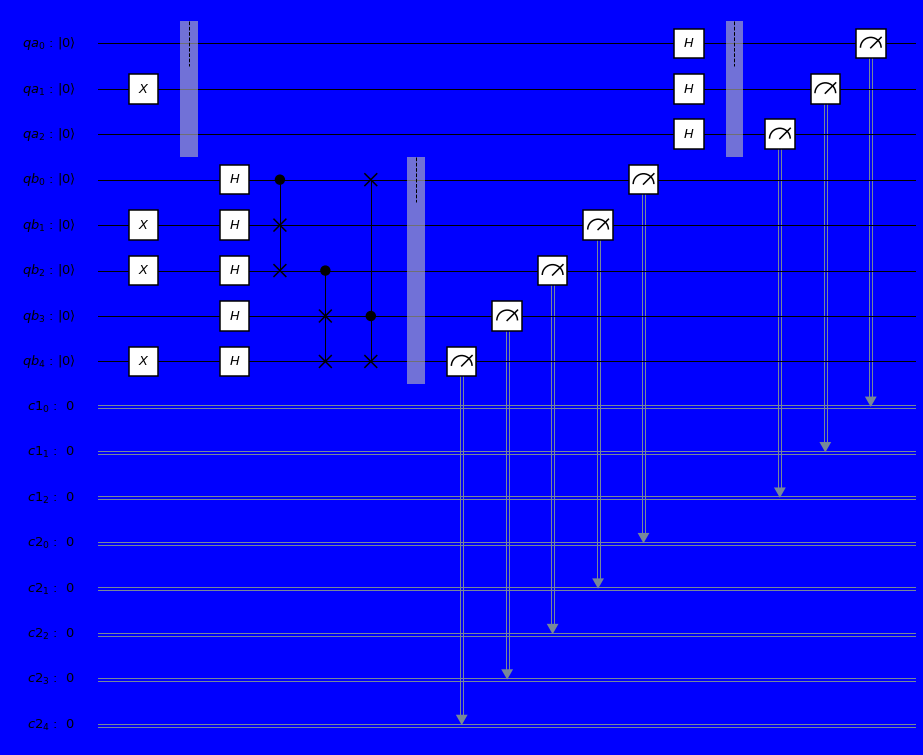

In [25]:
# Change the background color in mpl

style = {'backgroundcolor': 'blue'}

circuit.draw(output='mpl', style=style, filename='/tmp/fun.png')


## Latex Source

One additional option available with the latex output type is to return the raw LaTex source code instead of rendering an image for it. This enables easy integration in a seperate LaTex document. To use this you can just set the `output` kwarg to `'latex_source'`. You can also use the

In [27]:
# Print the latex source for the visualization
print(circuit.draw(output='latex_source'))

% \documentclass[preview]{standalone}
% If the image is too large to fit on this documentclass use
\documentclass[draft]{beamer}
% img_width = 16, img_depth = 15
\usepackage[size=custom,height=24,width=25,scale=0.7]{beamerposter}
% instead and customize the height and width (in cm) to fit.
% Large images may run out of memory quickly.
% To fix this use the LuaLaTeX compiler, which dynamically
% allocates memory.
\usepackage[braket, qm]{qcircuit}
\usepackage{amsmath}
\pdfmapfile{+sansmathaccent.map}
% \usepackage[landscape]{geometry}
% Comment out the above line if using the beamer documentclass.
\begin{document}
\begin{equation*}
    \Qcircuit @C=0.5em @R=0.0em @!R {
	 	\lstick{qa_{0}: \ket{0}} & \qw \barrier{7} & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \gate{H} \barrier[-1.15em]{2} & \qw & \qw & \meter & \qw & \qw\\
	 	\lstick{qa_{1}: \ket{0}} & \gate{X} & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \gate{H} & \qw & \meter & \qw & \qw & \qw\\
	 	\lstick{qa_{2}: \ket{0}} & 

In [29]:
# Save the latex source to a file
print(circuit.draw(output='latex_source', filename='/tmp/circuit.tex'))

% \documentclass[preview]{standalone}
% If the image is too large to fit on this documentclass use
\documentclass[draft]{beamer}
% img_width = 16, img_depth = 15
\usepackage[size=custom,height=24,width=25,scale=0.7]{beamerposter}
% instead and customize the height and width (in cm) to fit.
% Large images may run out of memory quickly.
% To fix this use the LuaLaTeX compiler, which dynamically
% allocates memory.
\usepackage[braket, qm]{qcircuit}
\usepackage{amsmath}
\pdfmapfile{+sansmathaccent.map}
% \usepackage[landscape]{geometry}
% Comment out the above line if using the beamer documentclass.
\begin{document}
\begin{equation*}
    \Qcircuit @C=0.5em @R=0.0em @!R {
	 	\lstick{qa_{0}: \ket{0}} & \qw \barrier{7} & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \gate{H} \barrier[-1.15em]{2} & \qw & \qw & \meter & \qw & \qw\\
	 	\lstick{qa_{1}: \ket{0}} & \gate{X} & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \gate{H} & \qw & \meter & \qw & \qw & \qw\\
	 	\lstick{qa_{2}: \ket{0}} & 